# Holt Winters Method for Double and Triple Exponential Smoothing

## Holt-Winters Methods
In the previous section on <strong>Exponentially Weighted Moving Averages</strong> (EWMA) we applied <em>Simple Exponential Smoothing</em> using just one smoothing factor $\alpha$ (alpha). This failed to account for other contributing factors like trend and seasonality.

In this section we'll look at <em>Double</em> and <em>Triple Exponential Smoothing</em> with the <a href='https://otexts.com/fpp2/holt-winters.html'>Holt-Winters Methods</a>. 

In <strong>Double Exponential Smoothing</strong> (aka Holt's Method) we introduce a new smoothing factor $\beta$ (beta) that addresses trend:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
y_t &= l_t + b_t & \text{    fitted model}\\
\hat y_{t+h} &= l_t + hb_t & \text{    forecasting model (} h = \text{# periods into the future)}\end{split}

Because we haven't yet considered seasonal fluctuations, the forecasting model is simply a straight sloped line extending from the most recent data point. We'll see an example of this in upcoming lectures.

With <strong>Triple Exponential Smoothing</strong> (aka the Holt-Winters Method) we introduce a smoothing factor $\gamma$ (gamma) that addresses seasonality:

\begin{split}l_t &= (1 - \alpha) l_{t-1} + \alpha x_t, & \text{    level}\\
b_t &= (1-\beta)b_{t-1} + \beta(l_t-l_{t-1}) & \text{    trend}\\
c_t &= (1-\gamma)c_{t-L} + \gamma(x_t-l_{t-1}-b_{t-1}) & \text{    seasonal}\\
y_t &= (l_t + b_t) c_t & \text{    fitted model}\\
\hat y_{t+m} &= (l_t + mb_t)c_{t-L+1+(m-1)modL} & \text{    forecasting model (} m = \text{# periods into the future)}\end{split}

Here $L$ represents the number of divisions per cycle. In our case looking at monthly data that displays a repeating pattern each year, we would use $L=12$.

In general, higher values for $\alpha$, $\beta$ and $\gamma$ (values closer to 1), place more emphasis on recent data.

## Simple Exponential Smoothing

A variation of the statmodels Holt-Winters function provides Simple Exponential Smoothing. We'll show that it performs the same calculation of the weighted moving average as the pandas <tt>.ewm()</tt> method:<br>
$\begin{split}y_0 &= x_0 \\
y_t &= (1 - \alpha) y_{t-1} + \alpha x_t,\end{split}$

## Double Exponential Smoothing
Where Simple Exponential Smoothing employs just one smoothing factor $\alpha$ (alpha), Double Exponential Smoothing adds a second smoothing factor $\beta$ (beta) that addresses trends in the data. Like the alpha factor, values for the beta factor fall between zero and one ($0<\beta≤1$). The benefit here is that the model can anticipate future increases or decreases where the level model would only work from recent calculations.

We can also address different types of change (growth/decay) in the trend. If a time series displays a straight-line sloped trend, you would use an <strong>additive</strong> adjustment. If the time series displays an exponential (curved) trend, you would use a <strong>multiplicative</strong> adjustment.

As we move toward forecasting, it's worth noting that both additive and multiplicative adjustments may become exaggerated over time, and require <em>damping</em> that reduces the size of the trend over future periods until it reaches a flat line.

## Triple Exponential Smoothing
Triple Exponential Smoothing, the method most closely associated with Holt-Winters, adds support for both trends and seasonality in the data. 

In [40]:
import numpy as np
import pandas as pd

from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

In [41]:
df = pd.read_csv("airline_passengers.csv", index_col= 0, parse_dates= True)

In [42]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [43]:
df.isna().sum()

Thousands of Passengers    0
dtype: int64

In [44]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

### Setting a DatetimeIndex Frequency
Note that our DatetimeIndex does not have a frequency. In order to build a Holt-Winters smoothing model, statsmodels needs to know the frequency of the data (whether it's daily, monthly etc.). Since observations occur at the start of each month, we'll use MS.<br>A full list of time series offset aliases can be found <a href='http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases'>here</a>.

In [45]:
df.index.freq = "MS" # "MS" stands for Month Start as our Data Points are all at The First Day of Month.

In [46]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

### 1) Simple Exponential Smoothing:

- Simple Exponential Smoothing Does Exactly the same calculation as Pandas ewm (exponentially weighted moving averages) method.

In [47]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [48]:
span = 12
alpha = 2 / (span + 1)

In [49]:
df["EWMA - 12 Months"] = df["Thousands of Passengers"].ewm(alpha= alpha, adjust= False).mean()

In [50]:
df.head()

,Thousands of Passengers,EWMA - 12 Months
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [51]:
ses_model = SimpleExpSmoothing(df["Thousands of Passengers"]) 

In [52]:
results= ses_model.fit(smoothing_level= alpha, optimized= False)

In [53]:
results

In [54]:
results.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [55]:
# As we can see, values gives by Simple Exponential Smoothing are exactly same as EWM, just shifted by 1 row

In [56]:
results.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [57]:
df["Simple_Expo_Smoothing - 12 Months"] = SimpleExpSmoothing(df["Thousands of Passengers"]).fit(smoothing_level= alpha,
                                                                                               optimized= False).fittedvalues.shift(-1)

In [58]:
df.head()

,Thousands of Passengers,EWMA - 12 Months,Simple_Expo_Smoothing - 12 Months
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


<AxesSubplot:xlabel='Month'>

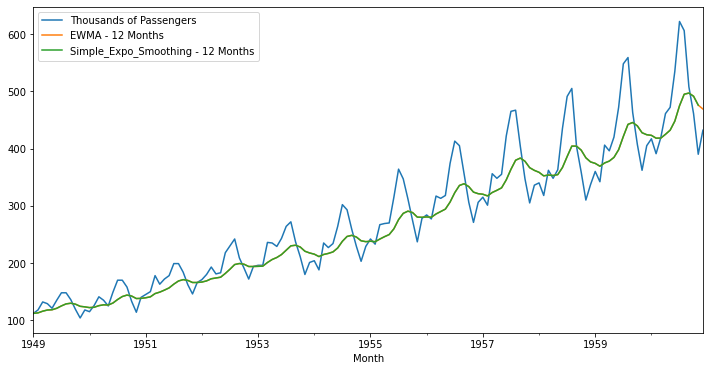

In [59]:
# Comparing Values of EWMA and Simple Exponential Smoothing:

df[["Thousands of Passengers", "EWMA - 12 Months", "Simple_Expo_Smoothing - 12 Months"]].plot(figsize= (12,6))

<AxesSubplot:xlabel='Month'>

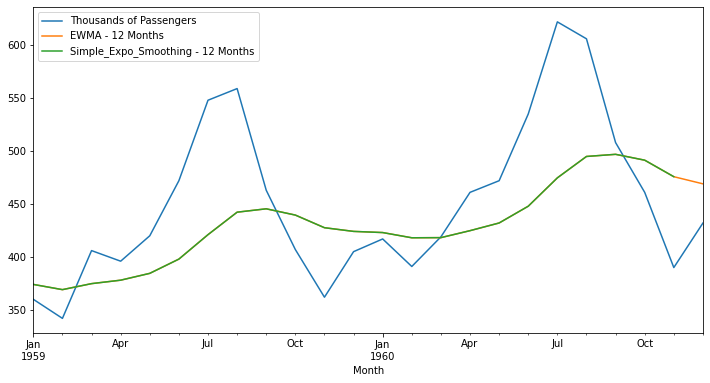

In [60]:
# Zooming in on Grapg By Viewing Only Last 24 Values (Last 2 Years Values):

df[["Thousands of Passengers", "EWMA - 12 Months", "Simple_Expo_Smoothing - 12 Months"]][-24:].plot(figsize= (12,6))

### 2) Double Exponential Smoothing:

In [61]:
df["Double_Expo_Smoothing_Add - 12 Months"] = ExponentialSmoothing(df["Thousands of Passengers"], 
                                                                   trend= "add").fit().fittedvalues.shift(-1)

In [62]:
df.head()

,Thousands of Passengers,EWMA - 12 Months,Simple_Expo_Smoothing - 12 Months,Double_Expo_Smoothing_Add - 12 Months
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


In [63]:
df["Double_Expo_Smoothing_Mul - 12 Months"] = ExponentialSmoothing(df["Thousands of Passengers"], 
                                                                   trend= "mul").fit().fittedvalues.shift(-1)

In [64]:
df.head()

,Thousands of Passengers,EWMA - 12 Months,Simple_Expo_Smoothing - 12 Months,Double_Expo_Smoothing_Add - 12 Months,Double_Expo_Smoothing_Mul - 12 Months
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267


<AxesSubplot:xlabel='Month'>

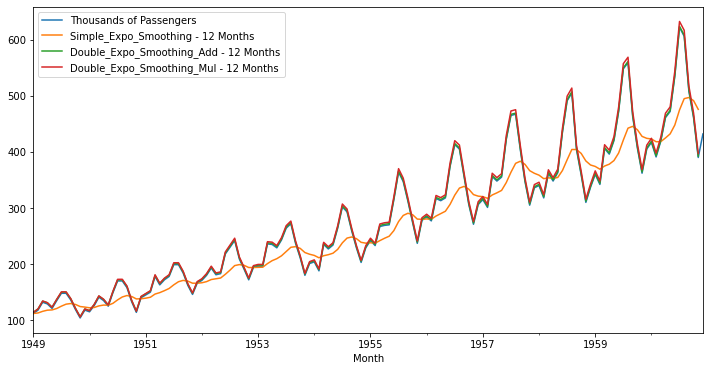

In [65]:
# Comparing Simple Exponential Smoothing With Double Exponential Smoothing (Both Additve ans Multiplicative):

df[["Thousands of Passengers", "Simple_Expo_Smoothing - 12 Months", "Double_Expo_Smoothing_Add - 12 Months", 
   "Double_Expo_Smoothing_Mul - 12 Months"]].plot(figsize= (12,6))

<AxesSubplot:xlabel='Month'>

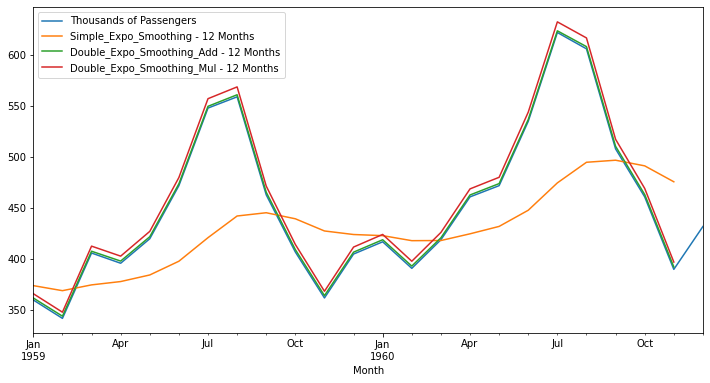

In [66]:
# Zooming in on Grapg By Viewing Only Last 24 Values (Last 2 Years Values):

df[["Thousands of Passengers", "Simple_Expo_Smoothing - 12 Months", "Double_Expo_Smoothing_Add - 12 Months", 
   "Double_Expo_Smoothing_Mul - 12 Months"]][-24:].plot(figsize= (12,6))

### 3) Triple Exponential Smoothing:

In [67]:
df["Triple_Expo_Smoothing_Add - 12 Months"] = ExponentialSmoothing(df["Thousands of Passengers"],
                                            trend= "add", seasonal= "Add",
                                            seasonal_periods= 12).fit().fittedvalues

In [68]:
df.head()

,Thousands of Passengers,EWMA - 12 Months,Simple_Expo_Smoothing - 12 Months,Double_Expo_Smoothing_Add - 12 Months,Double_Expo_Smoothing_Mul - 12 Months,Triple_Expo_Smoothing_Add - 12 Months
Month,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,112.034175
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,120.198998
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,134.709356
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,131.397488
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,124.641271


In [69]:
df["Triple_Expo_Smoothing_Mul - 12 Months"] = ExponentialSmoothing(df["Thousands of Passengers"],
                                            trend= "mul", seasonal= "mul",
                                            seasonal_periods= 12).fit().fittedvalues

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [70]:
df.head()

,Thousands of Passengers,EWMA - 12 Months,Simple_Expo_Smoothing - 12 Months,Double_Expo_Smoothing_Add - 12 Months,Double_Expo_Smoothing_Mul - 12 Months,Triple_Expo_Smoothing_Add - 12 Months,Triple_Expo_Smoothing_Mul - 12 Months
Month,,,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701,112.034175,111.591127
1949-02-01,118,112.923077,112.923077,120.040657,120.031669,120.198998,118.838169
1949-03-01,132,115.857988,115.857988,134.001539,134.235979,134.709356,133.330402
1949-04-01,129,117.879836,117.879836,131.085845,131.270786,131.397488,127.898656
1949-05-01,121,118.359861,118.359861,123.110263,123.156267,124.641271,120.979274


In [71]:
df.columns

Index(['Thousands of Passengers', 'EWMA - 12 Months',
       'Simple_Expo_Smoothing - 12 Months',
       'Double_Expo_Smoothing_Add - 12 Months',
       'Double_Expo_Smoothing_Mul - 12 Months',
       'Triple_Expo_Smoothing_Add - 12 Months',
       'Triple_Expo_Smoothing_Mul - 12 Months'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

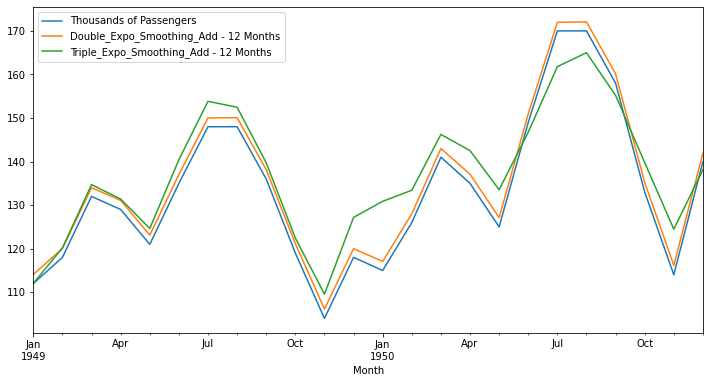

In [73]:
# Comparing Double Exponential Additive to Triple Exponential Additive:

df[["Thousands of Passengers", "Double_Expo_Smoothing_Add - 12 Months",
   "Triple_Expo_Smoothing_Add - 12 Months"]][:24].plot(figsize= (12,6))

<AxesSubplot:xlabel='Month'>

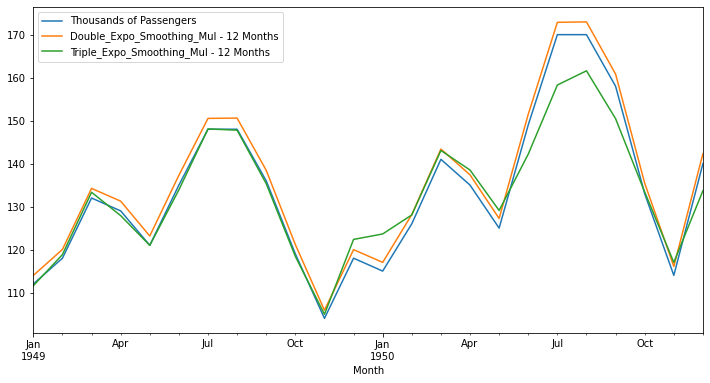

In [74]:
# Comparing Double Exponential Additive to Triple Exponential Multiplicative:

df[["Thousands of Passengers", "Double_Expo_Smoothing_Mul - 12 Months",
   "Triple_Expo_Smoothing_Mul - 12 Months"]][:24].plot(figsize= (12,6))

<AxesSubplot:xlabel='Month'>

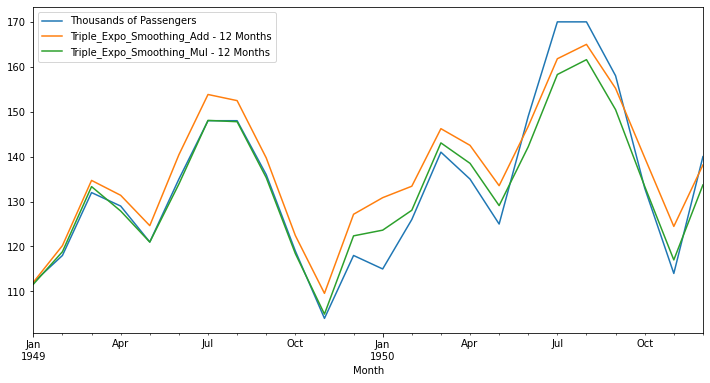

In [75]:
# Comparing Triple Exponential Additive to Triple Exponential Multiplicative:

df[["Thousands of Passengers", "Triple_Expo_Smoothing_Add - 12 Months",
   "Triple_Expo_Smoothing_Mul - 12 Months"]][:24].plot(figsize= (12,6))